In [96]:
import pandas as pd
import numpy as np
import urllib.request
import json
import datetime

In [37]:
csv_file_name_for_top_500 = 's&p_top500.csv'
csv_file_name_for_info_tech_companies = 'tech_sector_companies.csv'

In [84]:
df = pd.read_csv(csv_file_name_for_top_500)
df.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [85]:
top_500_companies_list = df['Symbol'].tolist()
print(top_500_companies_list)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AMD', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DH

In [86]:
# 5/2/2018
earning_today = ['AAC', 'ABC', 'AC', 'ACLS', 'ACOR', 'ADP', 'ADRO', 'ADSW', 'AEGN', 'AEL', 'AFG', 'AHC', 'AHL', 'AI', 'AIG', 'ALE', 'ALIM', 'ALPN', 'AME', 'AMOT', 'AMRN', 'ANH', 'ANIK', 'ANSS', 'AOSL', 'APA', 'APTV', 'APU', 'ARCC', 'AREX', 'ARI', 'ARTNA', 'ASC', 'ATO', 'AUY', 'AVA', 'AVDL', 'AWK', 'BAND', 'BBRG', 'BDC', 'BG', 'BIOL', 'BIP', 'BKCC', 'BKEP', 'BLUE', 'BPMC', 'BZH', 'CACI', 'CALI', 'CAMT', 'CAR', 'CAVM', 'CBRE', 'CCM', 'CCRN', 'CDW', 'CECO', 'CERN', 'CF', 'CFMS', 'CFNB', 'CHK', 'CIFS', 'CLH', 'CLI', 'CLR', 'CLX', 'CMPR', 'CNAT', 'CODI', 'COHN', 'CONE', 'CPE', 'CPLA', 'CRTO', 'CRUS', 'CRY', 'CSGS', 'CSII', 'CUB', 'CVS', 'CW', 'CXW', 'CZR', 'DATA', 'DBD', 'DDD', 'DFIN', 'DHIL', 'DIN', 'DNN', 'DNOW', 'DOOR', 'DRRX', 'DX', 'DXCM', 'ECR', 'EDGW', 'EFOI', 'EGL', 'EL', 'ELGX', 'EML', 'ENBL', 'ENR', 'ENSG', 'EQIX', 'ES', 'ESRX', 'ESS', 'EXC', 'EXEL', 'EXTN', 'EZPW', 'FEYE', 'FIT', 'FLKS', 'FLOW', 'FMC', 'FMI', 'FNF', 'FORM', 'FOXF', 'FRAC', 'FRPH', 'FRT', 'FUN', 'GBL', 'GHC', 'GHDX', 'GIB', 'GIL', 'GLAD', 'GLDD', 'GMED', 'GNRC', 'GPL', 'GRAM', 'GRMN', 'GSS', 'GTES', 'GXP', 'H', 'HABT', 'HBB', 'HBIO', 'HBM', 'HCC', 'HCCI', 'HFC', 'HGV', 'HI', 'HIIQ', 'HIVE', 'HK', 'HMN', 'HOLX', 'HOS', 'HRS', 'HSC', 'HST', 'HUM', 'HYH', 'ICFI', 'IDSY', 'IMDZ', 'INN', 'INSM', 'INVT', 'IO', 'IQV', 'IRTC', 'ITG', 'JCAP', 'JMP', 'JRVR', 'KCAP', 'KE', 'KHC', 'KL', 'KMT', 'KW', 'LADR', 'LAMR', 'LEXEA', 'LEXEB', 'LFUS', 'LGCY', 'LHCG', 'LHO', 'LINU', 'LITE', 'LIVN', 'LMRK', 'LNC', 'LNT', 'LNTH', 'LOGI', 'LOPE', 'LPI', 'LSI', 'MA', 'MAA', 'MAC', 'MANT', 'MASI', 'MBUU', 'MCEP', 'MDU', 'MEET', 'MET', 'MFC', 'MFNC', 'MGPI', 'MIC', 'MITT', 'MLR', 'MN', 'MOR', 'MRC', 'MRNS', 'MRO', 'MSG', 'MTDR', 'MTGE', 'MUR', 'MYRG', 'NAO', 'NC', 'NCI', 'NCLH', 'NE', 'NEWT', 'NGVT', 'NHTC', 'NI', 'NLY', 'NPO', 'NSA', 'NSIT', 'NVEC', 'NVMI', 'NVO', 'NVTR', 'NWPX', 'NXPI', 'OCN', 'OIIM', 'OMF', 'OPRX', 'ORBK', 'OSUR', 'OUT', 'OZM', 'PACB', 'PBI', 'PDCE', 'PES', 'PGRE', 'PJT', 'PNW', 'PRSS', 'PRU', 'PXD', 'PXLW', 'QGEN', 'QRVO', 'QTM', 'QTWO', 'RAIL', 'RDWR', 'RGLD', 'ROYT', 'RSG', 'RSPP', 'RTEC', 'RYI', 'RYN', 'S', 'SAFT', 'SEB', 'SFS', 'SGC', 'SGMS', 'SGU', 'SIGI', 'SITE', 'SO', 'SODA', 'SP', 'SPOT', 'SPR', 'SQ', 'SQNS', 'SR', 'SRCI', 'SRDX', 'SRI', 'SSW', 'SSYS', 'STAA', 'STRA', 'SUMR', 'SWM', 'TAHO', 'TAP', 'TCAP', 'TCP', 'TCRD', 'TECH', 'TGB', 'THG', 'TLF', 'TMHC', 'TORM', 'TPVG', 'TRNO', 'TSE', 'TSLA', 'TTEK', 'TTMI', 'TUSK', 'TYL', 'UE', 'UGI', 'UGP', 'UONE', 'UONEK', 'UTHR', 'VNDA', 'VSAR', 'VVV', 'W', 'WCN', 'WD', 'WK', 'WMB', 'WPX', 'WPZ', 'WSR', 'WTI', 'WTM', 'WYN', 'XL', 'XOXO', 'XPL', 'XPO', 'YUM', 'ZIXI', 'ZNGA', 'ZTS']

In [41]:
# 5/3/2018
earning_today = ['AAON', 'AAV', 'AAWW', 'ABCD', 'ABDC', 'ABMD', 'ABUS', 'ACET', 'ACHN', 'ACIA', 'ACUR', 'ADMS', 'ADNT', 'AER', 'AGII', 'AGO', 'AGS', 'AHT', 'AINC', 'AIZ', 'AKCA', 'AKRX', 'ALG', 'ALNY', 'ALRM', 'ALT', 'AMAG', 'AMH', 'AMN', 'ANET', 'APDN', 'APEN', 'APO', 'APPN', 'APRN', 'ARDX', 'ARES', 'AROC', 'ARW', 'ASPN', 'AT', 'ATEN', 'ATGE', 'ATH', 'ATOM', 'ATRA', 'ATTU', 'ATVI', 'AVD', 'AVEO', 'AVP', 'AYR', 'BANX', 'BAP', 'BAS', 'BCE', 'BDX', 'BELFA', 'BELFB', 'BEP', 'BERY', 'BFS', 'BGCP', 'BGS', 'BID', 'BKH', 'BL', 'BLL', 'BNFT', 'BORN', 'BRKR', 'BRSS', 'BSIG', 'BTE', 'BXC', 'BXG', 'CACC', 'CAH', 'CARG', 'CATM', 'CBIO', 'CBM', 'CBPX', 'CBS', 'CC', 'CCOI', 'CCR', 'CDR', 'CEIX', 'CENX', 'CFX', 'CGBD', 'CHD', 'CI', 'CIM', 'CJ', 'CLCT', 'CLMT', 'CMT', 'CNCE', 'CNQ', 'CNSL', 'CNX', 'CNXM', 'CNXN', 'COT', 'CPG', 'CPSI', 'CPT', 'CRC', 'CRIS', 'CRVS', 'CTIC', 'CTRL', 'CTT', 'CVGI', 'CWST', 'CYBR', 'CYRX', 'DCT', 'DMLP', 'DRH', 'DS', 'DVA', 'DVCR', 'DWDP', 'DWSN', 'DXTR', 'DXYN', 'EARN', 'EBS', 'EC', 'ECOL', 'ED', 'EDIT', 'EE', 'EEX', 'EGI', 'EMKR', 'ENIA', 'EOG', 'EPAY', 'EPC', 'ERF', 'ERI', 'ERII', 'ESL', 'ESPR', 'ESTE', 'EVA', 'EXK', 'FDUS', 'FFG', 'FLDM', 'FLR', 'FLT', 'FLY', 'FMS', 'FMSA', 'FND', 'FNMA', 'FTAI', 'FTNT', 'G', 'GEOS', 'GFF', 'GGP', 'GHL', 'GLYC', 'GNCA', 'GNE', 'GOLF', 'GOV', 'GPN', 'GPRO', 'GPX', 'GRFS', 'GSAT', 'GSBD', 'GSIT', 'GTHX', 'GTT', 'HASI', 'HAYN', 'HCP', 'HIFR', 'HII', 'HLF', 'HMHC', 'HPP', 'HR', 'HSON', 'HTGC', 'HZN', 'IBP', 'ICE', 'ICLR', 'IDA', 'IDRA', 'IEP', 'ILG', 'IMKTA', 'INAP', 'INGR', 'INTT', 'INUV', 'INXN', 'IRIX', 'ISDR', 'ISNS', 'ISR', 'ITGR', 'IVR', 'IVTY', 'JASN', 'JAX', 'JBSS', 'JCS', 'JMBA', 'JOBS', 'K', 'KERX', 'KKR', 'KLDX', 'KND', 'KNSL', 'KOP', 'KT', 'LDOS', 'LEE', 'LIND', 'LJPC', 'LKSD', 'LOCO', 'LPLA', 'LPSN', 'LQDT', 'LRAD', 'LXRX', 'LYV', 'MAIN', 'MCHX', 'MCRB', 'MDC', 'MDP', 'MDRX', 'MED', 'MEIP', 'MERC', 'MITL', 'MLCO', 'MMP', 'MPW', 'MRLN', 'MRTX', 'MSCI', 'MSGN', 'MSI', 'MTD', 'MTOR', 'MTX', 'MVIS', 'NAP', 'NERV', 'NEWM', 'NFG', 'NGVC', 'NLNK', 'NMRK', 'NRG', 'NSM', 'NTCT', 'NVEE', 'NVIV', 'NVUS', 'NWHM', 'NYLD', 'NYMT', 'NYNY', 'NYT', 'OA', 'OGE', 'OLED', 'ONE', 'OPNT', 'OR', 'ORBC', 'ORN', 'OSB', 'OSTK', 'P', 'PACDQ', 'PAH', 'PALDF', 'PBA', 'PBF', 'PBFX', 'PCG', 'PCH', 'PCRX', 'PCTY', 'PE', 'PETX', 'PF', 'PFSI', 'PICO', 'PK', 'PLYM', 'PMT', 'PODD', 'POST', 'PPL', 'PRA', 'PTIE', 'PULM', 'PWR', 'RACE', 'RAS', 'REFR', 'REGI', 'REGN', 'RFP', 'RLGY', 'RMAX', 'RMGN', 'RNN', 'RNWK', 'RP', 'RPT', 'RSO', 'RTIX', 'RUBI', 'SAEX', 'SAGE', 'SAMG', 'SBH', 'SBSAA', 'SCCO', 'SEE', 'SEM', 'SFM', 'SHAK', 'SHEN', 'SHLX', 'SIGA', 'SLCT', 'SM', 'SMLP', 'SMP', 'SNN', 'SPAR', 'SPNE', 'SPPI', 'SPXC', 'SRCL', 'SREV', 'SRG', 'SRPT', 'SRTS', 'STAR', 'STC', 'STMP', 'STOR', 'SWIR', 'SWKS', 'SYNL', 'TACO', 'TACT', 'TDC', 'TDY', 'TEGP', 'TEP', 'TEVA', 'TFX', 'TGTX', 'THS', 'TNAV', 'TOWR', 'TPIC', 'TPX', 'TRGP', 'TRVN', 'TSLX', 'TSRO', 'TTPH', 'TUES', 'TVPT', 'TWOU', 'TXMD', 'UEIC', 'UFPT', 'ULBI', 'UNT', 'USPH', 'UTI', 'VAC', 'VEDL', 'VIAV', 'VICI', 'VICL', 'VMC', 'VREX', 'VTVT', 'VXRT', 'WAIR', 'WEB', 'WEX', 'WGL', 'WIFI', 'WIN', 'WING', 'WLDN', 'WLK', 'WLKP', 'WSTG', 'WTS', 'WTW', 'WWE', 'XHR', 'XPER', 'XRX', 'Y', 'YRCW', 'ZAYO', 'ZEUS']

In [87]:
def getTop500EarningToday(top_500_companies_list, all_companies_earning_today):
    top500_earning_today = []
    
    for top500 in top_500_companies_list:
        if top500 in all_companies_earning_today:
            top500_earning_today.append(top500)
    
    return top500_earning_today

In [51]:
def getInfoTechEarningToday(info_tech_company_list, all_companies_earning_today):
    info_tech_earning_today = []
    for com in info_tech_company_list:
        if com in all_companies_earning_today:
            info_tech_earning_today.append(com)

    return info_tech_earning_today

In [88]:
print('TOP 500 Information Technology Companies who has earning report today:')

top500_earning_today = getTop500EarningToday(top_500_companies_list, earning_today)
top500_earning_today_with_info_df = df.loc[df['Symbol'].isin(top500_earning_today) & df['Sector'].isin(['Information Technology'])]

print(top500_earning_today_with_info_df)

TOP 500 Information Technology Companies who has earning report today:
    Symbol                       Name                  Sector
46    ANSS                      ANSYS  Information Technology
60     ADP  Automatic Data Processing  Information Technology
222    HRS         Harris Corporation  Information Technology
299     MA            Mastercard Inc.  Information Technology
382   QRVO                      Qorvo  Information Technology


In [95]:
test_list = top500_earning_today_with_info_df['Symbol'].tolist()
for ticker in test_list:
    print(ticker)
    getTickerAndPriceMovementBeforeAndAfterEarningDay('2018-05-01', ticker)

ANSS
2018-05-01:{'1. open': '161.5800', '2. high': '162.9400', '3. low': '159.6600', '4. close': '161.1100', '5. volume': '315107'}
2018-05-02:{'1. open': '160.3400', '2. high': '162.8200', '3. low': '158.6300', '4. close': '160.6100', '5. volume': '493414'}
ADP
2018-05-01:{'1. open': '112.6500', '2. high': '119.1400', '3. low': '112.5800', '4. close': '118.8000', '5. volume': '2526491'}
2018-05-02:{'1. open': '123.0100', '2. high': '123.9900', '3. low': '120.2800', '4. close': '122.0600', '5. volume': '5421362'}
HRS
2018-05-01:{'1. open': '157.1600', '2. high': '157.5350', '3. low': '151.0200', '4. close': '151.7800', '5. volume': '1228380'}
2018-05-02:{'1. open': '153.3000', '2. high': '157.3400', '3. low': '146.3200', '4. close': '146.7600', '5. volume': '1296290'}
MA
2018-05-01:{'1. open': '178.2700', '2. high': '180.3600', '3. low': '176.9100', '4. close': '180.2500', '5. volume': '4814916'}
2018-05-02:{'1. open': '186.2000', '2. high': '188.2500', '3. low': '183.1200', '4. close'

In [53]:
df = pd.read_csv(csv_file_name_for_info_tech_companies)
df.head()
info_tech_company_list = df['Symbol'].tolist()
print(info_tech_company_list)

['VNET', 'TWOU', 'DDD', 'JOBS', 'WUBA', 'ATEN', 'AAN', 'ACIA', 'ACIW', 'ACMR', 'ATVI', 'ATU', 'ACXM', 'IOTS', 'ADBE', 'AMD', 'AER', 'ACY', 'HIVE', 'AGYS', 'AGMH', 'AL', 'AYR', 'AIRG', 'AMCN', 'ALRM', 'ALLT', 'MDRX', 'AOSL', 'GOOG', 'GOOGL', 'AABA', 'ALTR', 'AYX', 'AMBA', 'AMBR', 'DOX', 'AMRH', 'AMRHW', 'AMSWA', 'AMKR', 'AMN', 'ASYS', 'ADI', 'ANSS', 'APPF', 'APPN', 'AAPL', 'AMAT', 'AAOI', 'APTI', 'AQ', 'ANET', 'ARRS', 'ASGN', 'ASML', 'AZPN', 'ALOT', 'ASUR', 'TEAM', 'ATOM', 'ATTU', 'AUO', 'ADSK', 'ATHM', 'ADP', 'AUTO', 'AVNW', 'AVID', 'AWRE', 'ACLS', 'AXTI', 'BOSC', 'BIDU', 'BAND', 'BBSI', 'BHE', 'BNFT', 'BGSF', 'BILI', 'BKYI', 'BITA', 'BBOX', 'BKI', 'BLKB', 'BB', 'BL', 'BDR', 'BRQS', 'EPAY', 'BOX', 'BLIN          ', 'BCOV', 'AVGO', 'BVSN', 'BRKS', 'CA', 'CCMP', 'CACI', 'CDNS', 'CAI', 'CAMP', 'CSIQ', 'CARB', 'CDLX', 'CARG', 'CARS', 'CASA', 'CSLT', 'CAVM', 'CLS', 'CRNT', 'CDAY', 'CERN', 'CEVA', 'CYOU', 'ECOM          ', 'CHKP', 'CMCM', 'CVR', 'CNIT', 'CCIH', 'CNET', 'IMOS', 'CRUS', 'CSCO'

In [54]:
info_tech_earning_today = getInfoTechEarningToday(info_tech_company_list, earning_today)
info_tech_earning_today_with_info_df = df.loc[df['Symbol'].isin(info_tech_earning_today) & df['Sector'].isin(['Information Technology'])]
print(top500_earning_today_with_info_df)

    Symbol                       Name                  Sector
46    ANSS                      ANSYS  Information Technology
60     ADP  Automatic Data Processing  Information Technology
222    HRS         Harris Corporation  Information Technology
299     MA            Mastercard Inc.  Information Technology
382   QRVO                      Qorvo  Information Technology


In [104]:
def getTickerAndPriceMovementBeforeAndAfterEarningDay(date, ticker):
    date_lst = date.split('-')
    before_earning_date = datetime.date(int(date_lst[0]), int(date_lst[1]), int(date_lst[2]))
    after_earning_date = before_earning_date + datetime.timedelta(days=1)
    
    # use alpha vantage to get the daily close price
    r = urllib.request.urlopen('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + ticker + '&apikey=T8HUBVS6MFXA6800')
    json_obj = json.loads(r.read())
    print(str(before_earning_date) + ':' + str(json_obj['Time Series (Daily)'][before_earning_date.isoformat()]))
    print(str(after_earning_date) + ':' + str(json_obj['Time Series (Daily)'][after_earning_date.isoformat()]))

def getTickerDailyStockPrice(ticker):
    r = urllib.request.urlopen('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=' + ticker + '&outputsize=full&apikey=T8HUBVS6MFXA6800')
    json_obj = json.loads(r.read())
    return json_obj

def getDailyStockPriceForPast4Earning(earning_date, ticker):
    for date in earning_date:
        stock_price_daily_series = getTickerDailyStockPrice(ticker)
        date_lst = date.split('-')
        before_earning_date = datetime.date(int(date_lst[0]), int(date_lst[1]), int(date_lst[2]))
        after_earning_date = before_earning_date + datetime.timedelta(days=1)

        print(str(before_earning_date) + ':' + str(stock_price_daily_series['Time Series (Daily)'][before_earning_date.isoformat()]))
        print(str(after_earning_date) + ':' + str(stock_price_daily_series['Time Series (Daily)'][after_earning_date.isoformat()]))

In [105]:
# Mar2018	05/01/2018	2.73	2.69	1.49
# Dec2017	02/01/2018	3.89	3.82	1.83
# Sep2017	11/02/2017	2.07	1.87	10.7
# Jun2017	08/01/2017	1.67	1.57	6.37
AAPL_earning_date = ['2018-05-01', '2018-02-01', '2017-11-02', '2017-08-01']
AAPL_ticker = 'AAPL'
getDailyStockPriceForPast4Earning(AAPL_earning_date, AAPL_ticker)

2018-05-01:{'1. open': '166.4102', '2. high': '169.2000', '3. low': '165.2700', '4. close': '169.1000', '5. volume': '51740866'}
2018-05-02:{'1. open': '175.2250', '2. high': '177.7500', '3. low': '173.8000', '4. close': '176.5700', '5. volume': '66511949'}
2018-02-01:{'1. open': '167.1650', '2. high': '168.6200', '3. low': '166.7600', '4. close': '167.7800', '5. volume': '38099665'}
2018-02-02:{'1. open': '166.0000', '2. high': '166.8000', '3. low': '160.1000', '4. close': '160.5000', '5. volume': '85436075'}
2017-11-02:{'1. open': '167.6400', '2. high': '168.5000', '3. low': '165.2800', '4. close': '168.1100', '5. volume': '32710040'}
2017-11-03:{'1. open': '174.0000', '2. high': '174.2600', '3. low': '171.1200', '4. close': '172.5000', '5. volume': '58683826'}
2017-08-01:{'1. open': '149.1000', '2. high': '150.2200', '3. low': '148.4100', '4. close': '150.0500', '5. volume': '24725526'}
2017-08-02:{'1. open': '159.2800', '2. high': '159.7500', '3. low': '156.1600', '4. close': '157.

In [106]:
# Jan2018	02/08/2018	1.57	1.01	55.45
# Oct2017	11/09/2017	1.33	0.94	41.49
# Jul2017	08/10/2017	0.92	0.61	50.82
# Apr2017	05/09/2017	0.82	0.66	24.24

NVDA_earning_date = ['2018-02-08', '2017-11-09', '2017-08-10', '2017-05-09']
NVDA_ticker = 'NVDA'
getDailyStockPriceForPast4Earning(NVDA_earning_date, NVDA_ticker)

2018-02-08:{'1. open': '233.8800', '2. high': '235.2200', '3. low': '217.5100', '4. close': '217.5200', '5. volume': '21664353'}
2018-02-09:{'1. open': '238.2500', '2. high': '238.8900', '3. low': '217.5200', '4. close': '232.0800', '5. volume': '41044898'}
2017-11-09:{'1. open': '205.2700', '2. high': '206.3300', '3. low': '200.3700', '4. close': '205.3200', '5. volume': '20123846'}
2017-11-10:{'1. open': '213.0800', '2. high': '218.6700', '3. low': '211.6300', '4. close': '216.1400', '5. volume': '31197127'}
2017-08-10:{'1. open': '172.1600', '2. high': '172.6600', '3. low': '164.3300', '4. close': '164.7400', '5. volume': '26065538'}
2017-08-11:{'1. open': '157.1400', '2. high': '159.0000', '3. low': '152.9100', '4. close': '155.9600', '5. volume': '37272782'}
2017-05-09:{'1. open': '103.0000', '2. high': '104.9300', '3. low': '102.6600', '4. close': '102.9400', '5. volume': '13796401'}
2017-05-10:{'1. open': '114.2900', '2. high': '121.8200', '3. low': '114.0200', '4. close': '121.

In [108]:
# Dec2017	02/07/2018	-3.84	-3.75	-2.4
# Sep2017	11/01/2017	-3.59	-3.09	-16.18
# Jun2017	08/02/2017	-2.04	-2	-2
# Mar2017	05/03/2017	-1.97	-0.67	-194.03
TSLA_earning_date = ['2018-02-07', '2017-11-01', '2017-08-02', '2017-05-03']
TSLA_ticker = 'TSLA'
getDailyStockPriceForPast4Earning(TSLA_earning_date, TSLA_ticker)

2018-02-07:{'1. open': '338.9900', '2. high': '346.0000', '3. low': '335.6600', '4. close': '345.0000', '5. volume': '5846823'}
2018-02-08:{'1. open': '343.3100', '2. high': '348.6200', '3. low': '314.6000', '4. close': '315.2300', '5. volume': '9996464'}
2017-11-01:{'1. open': '332.2500', '2. high': '332.6100', '3. low': '320.2600', '4. close': '321.0800', '5. volume': '7028856'}
2017-11-02:{'1. open': '300.1300', '2. high': '308.6900', '3. low': '292.6300', '4. close': '299.2600', '5. volume': '19731322'}
2017-08-02:{'1. open': '318.9400', '2. high': '327.1200', '3. low': '311.2200', '4. close': '325.8900', '5. volume': '9911432'}
2017-08-03:{'1. open': '345.3300', '2. high': '350.0000', '3. low': '343.1500', '4. close': '347.0900', '5. volume': '13448583'}
2017-05-03:{'1. open': '317.6700', '2. high': '321.5300', '3. low': '310.4500', '4. close': '311.0200', '5. volume': '6278906'}
2017-05-04:{'1. open': '307.4400', '2. high': '307.7700', '3. low': '290.7600', '4. close': '295.4600'

In [109]:
# Dec2017	02/08/2018	0.88	0.91	-3.3
# Sep2017	11/02/2017	0.43	0.45	-4.44
# Jun2017	08/03/2017	0.51	0.25	104
# Mar2017	05/04/2017	0.27	0.16	68.75
ATVI_earning_date = ['2018-02-08', '2017-11-02', '2017-08-03', '2017-05-04']
ATVI_ticker = 'ATVI'
getDailyStockPriceForPast4Earning(ATVI_earning_date, ATVI_ticker)

2018-02-08:{'1. open': '69.6300', '2. high': '69.7900', '3. low': '65.7600', '4. close': '65.8300', '5. volume': '9778437'}
2018-02-09:{'1. open': '66.9900', '2. high': '67.7800', '3. low': '63.3200', '4. close': '67.0800', '5. volume': '17754889'}
2017-11-02:{'1. open': '65.4100', '2. high': '65.8400', '3. low': '64.8250', '4. close': '65.4500', '5. volume': '5587306'}
2017-11-03:{'1. open': '66.8700', '2. high': '67.0300', '3. low': '62.1100', '4. close': '63.2000', '5. volume': '18650840'}
2017-08-03:{'1. open': '63.0100', '2. high': '64.0600', '3. low': '61.7600', '4. close': '63.9700', '5. volume': '11572024'}
2017-08-04:{'1. open': '63.0200', '2. high': '63.3000', '3. low': '61.2200', '4. close': '62.0100', '5. volume': '10409797'}
2017-05-04:{'1. open': '52.9700', '2. high': '53.3800', '3. low': '52.4600', '4. close': '53.1000', '5. volume': '7601504'}
2017-05-05:{'1. open': '54.0050', '2. high': '54.7500', '3. low': '53.0750', '4. close': '53.8300', '5. volume': '10503007'}


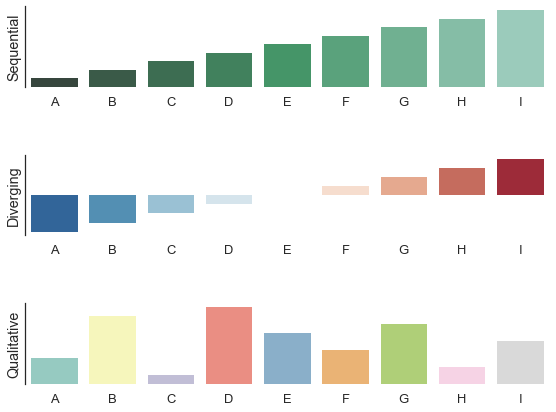

In [101]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

sns.set(style="white", context="talk")
rs = np.random.RandomState(7)


# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHI"))
y1 = np.arange(1, 10)
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, 9, replace=False)
sns.barplot(x, y3, palette="Set3", ax=ax3)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)